<a href="https://colab.research.google.com/github/PinKem253/PixelDigits_Classification_Using_CNN_Model/blob/main/pixel_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup dataset and exploring data

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,transforms


In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=8),
    transforms.RandomResizedCrop(size=28,scale=(0.8,1.2)),
    transforms.ToTensor(),
])

In [ ]:
train_dataset = datasets.MNIST(
    root="/mnist-dataset",
    train=True,
    download=True,
    transform= transform
)

test_dataset = datasets.MNIST(
    root="/mnist-dataset",
    train=False,
    download=True,
    transform = transforms.ToTensor()
)

In [ ]:
img,_ = train_dataset[0]
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0745, 0.5922, 0.1333, 0.4784, 0.7843,

In [ ]:
len(train_dataset),len(test_dataset)

(60000, 10000)

In [ ]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
"""
img,label = train_dataset[0]
img,label
"""
labels =[label for img,label in train_dataset]
#labels

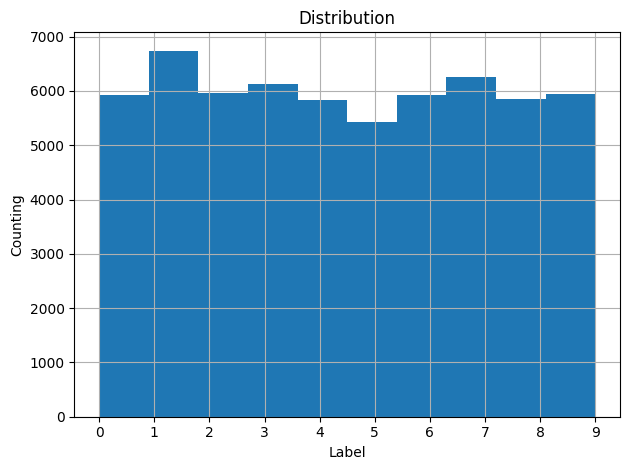

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = [label for _,label in train_dataset]

plt.hist(labels)
#sns.kdeplot(data=labels,color="blue",fill=True)
plt.xticks(range(len(class_names)))
plt.xlabel('Label')
plt.ylabel('Counting')
plt.title("Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

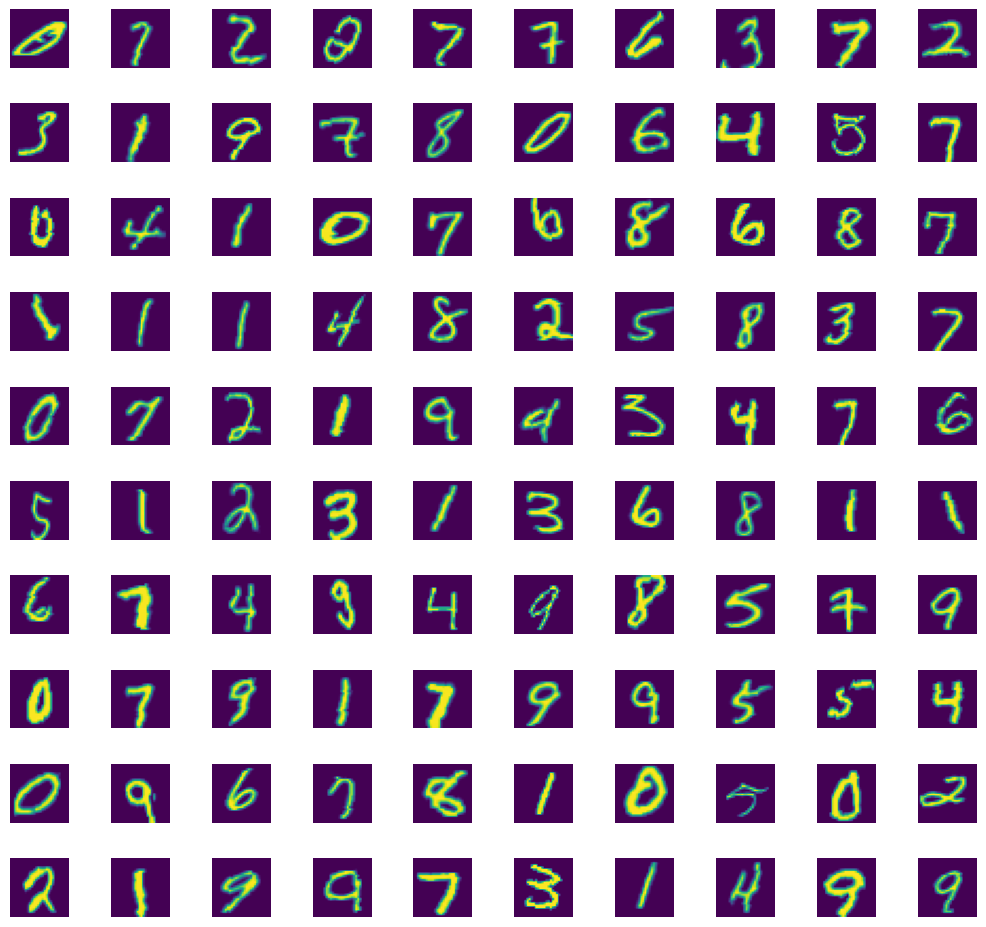

In [ ]:
import matplotlib.pyplot as plt
def plot_samples(nrows:int,ncols:int):
  fig = plt.figure(figsize=(nrows,ncols))
  for i in range(1,nrows*ncols+1):
    idx = torch.randint(0,len(train_dataset),size=[1]).item()
    image,label = train_dataset[idx]

    fig.add_subplot(nrows,ncols,i)
    plt.imshow(image.squeeze())
    plt.tight_layout()
    plt.axis(False)

plot_samples(10,10)


In [ ]:
\
img,_ = train_dataset[0]
img.shape

torch.Size([1, 28, 28])

# 2. Create DataLoaders

In [ ]:
from torch.utils.data import DataLoader
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size = BATCH_SIZE,
                              num_workers = NUM_WORKERS,
                              shuffle=True,
                              pin_memory=True,
                              )

test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             num_workers = NUM_WORKERS,
                             pin_memory = True,
                             shuffle=False,
                             )



# 3. Building a simple Baseline Model

In [ ]:
class ClassificationModel(nn.Module):
  def __init__(self,input_layer,hidden_layer,output_layer):
    super().__init__()
    self.input_layer = input_layer
    self.hidden_layer = hidden_layer
    self.output_layer = output_layer


    self.block_1 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_layer,out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features = hidden_layer,out_features = hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer,out_features = output_layer)
    )
  def forward(self,x):
    return self.block_1(x)

# 4. Building a CNN model to extract feature

In [ ]:
class CNN_Model(nn.Module):
  def __init__(self,input_layer,hidden_layer,output_layer):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     )
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_layer * 7 *7,
                  out_features = output_layer,
                  )
    )
  def forward(self,x):
    return self.classifier(self.block_2(self.block_1(x)))



In [ ]:
img,label = next(iter(train_dataloader))
print(img[0].shape)
flatten = nn.Flatten(start_dim=1,end_dim=3)
in_size = flatten(img)
print(in_size.shape)


torch.Size([1, 28, 28])
torch.Size([32, 784])


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model = ClassificationModel(input_layer=in_size.shape[1],
                            hidden_layer = 10,
                            output_layer = len(class_names)
                            ).to(device)

NameError: name 'ClassificationModel' is not defined

In [ ]:
img = torch.rand(size=[32,1,28,28])
model_0 = CNN_Model(input_layer=1,
                    hidden_layer=10,
                    output_layer=len(class_names)
                    ).to(device)


#model_0(img)

In [ ]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [ ]:
summary(model=model,input_size=[32,1,28,28])

NameError: name 'model' is not defined

In [ ]:
summary(model=model_0,input_size=[32,1,28,28])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_Model                                [32, 10]                  --
├─Sequential: 1-1                        [32, 10, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 10, 28, 28]          100
│    └─ReLU: 2-2                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-3                       [32, 10, 28, 28]          910
│    └─ReLU: 2-4                         [32, 10, 28, 28]          --
│    └─MaxPool2d: 2-5                    [32, 10, 14, 14]          --
├─Sequential: 1-2                        [32, 10, 7, 7]            --
│    └─Conv2d: 2-6                       [32, 10, 14, 14]          910
│    └─ReLU: 2-7                         [32, 10, 14, 14]          --
│    └─Conv2d: 2-8                       [32, 10, 14, 14]          910
│    └─ReLU: 2-9                         [32, 10, 14, 14]          --
│    └─MaxPool2d: 2-10                   [32, 10, 7, 7]            --
├─Sequentia

# 5. Import evaluation metrics

In [ ]:
try:
  from torchmetrics import Accuracy
  from torchmetrics import Precision
  from torchmetrics import Recall
  from torchmetrics import F1Score
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy
  from torchmetrics import Precision
  from torchmetrics import Recall
  from torchmetrics import F1Score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 47.7 MB/s eta 0:00:00


#Average Method
* micro: calculate metrics gloabally by counting total TP,FN,FP of all classes, suitable for overall performance instead of individual class performance

* macro: Calculate for each class independently then takes unweighted mean. Used when give equal importance to all classes even have different sizes

* weighted: calculate each class independently then takes weighted mean, weights are proportional to the number of true instances for each class. suitable when accounting for class imbalances

* None: Metrics individually each class without averaging, use when analyzing the performance of model on specific classes

In [ ]:
def accuracy(y_pred,y_true,num_classes:int,device:torch.device):
  acc = Accuracy(task="multiclass",num_classes = num_classes).to(device)
  return acc(y_pred,y_true)
def precision(y_pred,y_true,num_classes:int,device:torch.device):
  precision = Precision(task="multiclass",average="micro",num_classes = num_classes).to(device)
  return precision(y_pred,y_true)
def recall(y_pred,y_true,num_classes:int,device:torch.device):
  recall = Recall(task="multiclass",average="micro",num_classes= num_classes).to(device)
  return recall(y_pred,y_true)
def f1(y_pred,y_true,num_classes:int,device:torch.device):
  f1 = F1Score(task="multiclass",average="micro",num_classes=num_classes).to(device)
  return f1(y_pred,y_true)





In [ ]:
model_0.eval()

pre,re,f1score=0,0,0
for batch,(X,y) in enumerate(test_dataloader):
  X,y = X.to(device),y.to(device)

  y_pred = model_0(X)
  y_pred_label = y_pred.argmax(dim=1)


  p = precision(y_pred,y,num_classes=len(class_names),device=device)
  r = recall(y_pred,y,num_classes=len(class_names),device=device)
  f = f1(y_pred,y,num_classes = len(class_names),device=device)

  pre+= p.item()
  re+= r.item()
  f1score += f.item()

print(pre/len(test_dataloader),re/len(test_dataloader),f1score/len(test_dataloader))


0.9637579872204473 0.9637579872204473 0.9637579872204473


# 6. Create a train,test and compile

In [ ]:
from tqdm.auto import tqdm

def train_step(dataloader:torch.utils.data.DataLoader,
               model:torch.nn.Module,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               num_classes:int,
               device:torch.device
               ):
  model.train()
  train_loss,train_acc = 0,0

  for batch,(X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    y_pred_label = y_pred.argmax(dim=1)
    acc = accuracy(y_pred_label,y,num_classes,device)
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(dataloader)
  train_acc /=len(dataloader)

  return train_acc,train_loss

def test_step(dataloader:torch.utils.data.DataLoader,
              model:torch.nn.Module,
              loss_fn: torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              num_classes:int,
              device:torch.device,
              ):
  model.eval()
  test_loss,test_acc,precision_score,recall_score,f1_score = 0,0,0,0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred,y)
      test_loss+= loss

      y_pred_label = y_pred.argmax(dim=1)
      acc = accuracy(y_pred_label,y,num_classes,device)
      test_acc += acc

      pre = precision(y_pred_label,y,num_classes,device)
      precision_score+= pre.item()

      re = recall(y_pred_label,y,num_classes,device)
      recall_score+= re.item()

      f1score = f1(y_pred_label,y,num_classes,device)
      f1_score+= f1score.item()

    test_loss/=len(dataloader)
    test_acc /=len(dataloader)
    precision_score/=len(dataloader)
    recall_score /= len(dataloader)
    f1_score /= len(dataloader)

  return test_acc,test_loss,precision_score,recall_score,f1_score



def compile(model:torch.nn.Module,
            train_dataloader:torch.utils.data.DataLoader,
            test_dataloader:torch.utils,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            device:torch.device,
            num_classes:int,
            epochs:int,
            ):
  early_stopping = EarlyStopping(tolerance=5,min_delta=0.01)



  history={
      "epochs":[],
      "train_acc":[],
      "train_loss":[],
      "test_acc":[],
      "test_loss":[],
      "precision":[],
      "recall":[],
      "f1":[],

  }

  for epoch in tqdm(range(epochs+1)):
    train_acc,train_loss = train_step(dataloader=train_dataloader,
                                      model=model,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      num_classes=num_classes,
                                      device=device,
                                      )

    test_acc,test_loss,precision,recall,f1 = test_step(dataloader=test_dataloader,
                                   model=model,
                                   loss_fn = loss_fn,
                                   optimizer=optimizer,
                                   num_classes=num_classes,
                                   device=device,
                                   )


    if(epoch%10==0):
      print('-'*100)
      print(f"Epochs: {epoch}")
      print(f"Train acc: {train_acc:.3f} | Train loss: {train_loss:.3f} | Test acc: {test_acc:.3f} | Test loss: {test_loss:.3f}")

      history["epochs"].append(epoch)
      history["train_acc"].append(train_acc)
      history["train_loss"].append(train_loss)
      history["test_acc"].append(test_acc)
      history["test_loss"].append(test_loss)
      history["precision"].append(precision)
      history["recall"].append(recall)
      history["f1"].append(f1)
  early_stopping(train_loss,test_loss)
  if early_stopping.early_stop:
    print(f"Current epoch: {epoch}")
    return history



  return history








# 7.Create a tracking plot

In [ ]:
import matplotlib.pyplot as plt

def tracking_plot(history):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))

    epochs = history["epochs"]
    train_acc = [acc.cpu().item() for acc in history["train_acc"]]
    train_loss = history["train_loss"]
    test_acc = [x.cpu().item() for x in history["test_acc"]]
    test_loss = [x.cpu().item() for x in history["test_loss"]]
    precision = [x for x in history["precision"]]
    recall = [x for x in history["recall"]]
    f1 = [x for x in history["f1"]]


    ax1.plot(epochs, train_acc, label="Train Accuracy", c="orange")
    ax1.plot(epochs, test_acc, label="Test Accuracy", c="green")
    ax1.set(title="Model Accuracy", xlabel="Epochs", ylabel="Accuracy")
    ax1.grid(True)
    ax1.legend(loc="best")

    ax2.plot(epochs, train_loss, label="Train Loss", c="orange")
    ax2.plot(epochs, test_loss, label="Test Loss", c="green")
    ax2.set(title="Model Loss", xlabel="Epochs", ylabel="Loss")
    ax2.grid(True)
    ax2.legend(loc="best")

    ax3.plot(epochs,precision,label="Precision",c="blue",marker="o")
    ax3.plot(epochs,recall,label="Recall",c="orange",marker="s")
    ax3.plot(epochs,f1,label="F1_Score",c="green",marker="^")
    ax3.set(title="Evaluation Metrics Score",xlabel="Epochs",ylabel="Score")
    ax3.grid(True)
    ax3.legend(loc="best")

    plt.tight_layout()
    plt.show()


# 8. Compiling on different models

* Testing on simple model

In [ ]:
epochs = 100
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

history = compile(model=model,
                  train_dataloader= train_dataloader,
                  test_dataloader = test_dataloader,
                  loss_fn =loss_fn,
                  optimizer=optimizer,
                  num_classes = len(class_names),
                  device =device,
                  epochs = epochs
                  )

In [ ]:
history

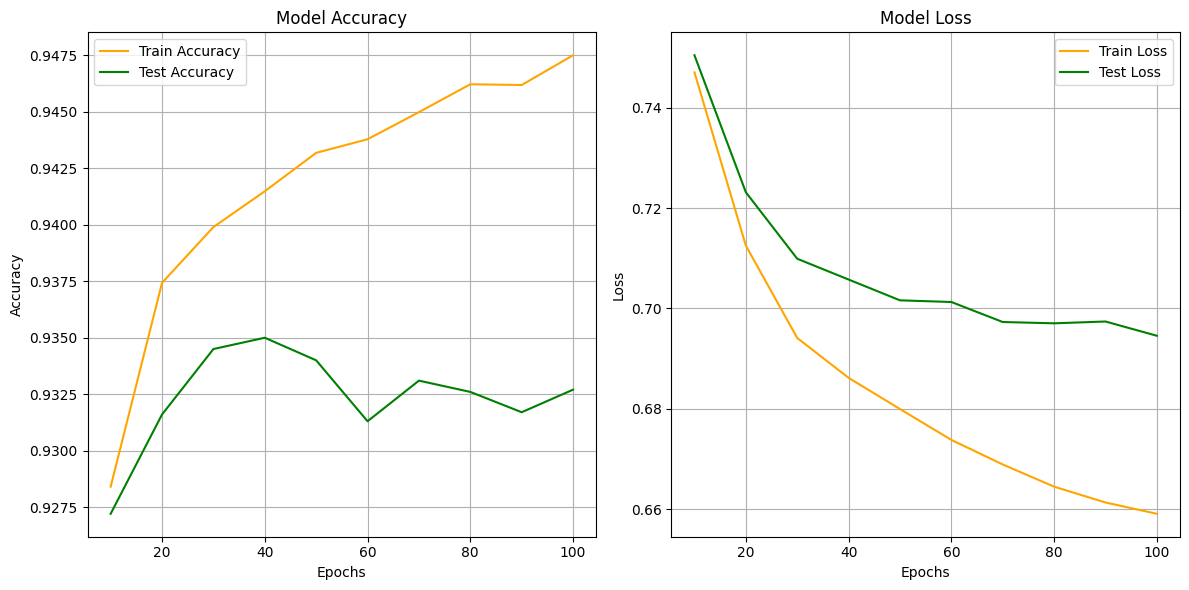

In [ ]:
tracking_plot(history)


* Testing on CNN model

In [ ]:
epochs = 200
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model_0.parameters(),lr=1e-3)

history_0 = compile(model=model_0,
                    train_dataloader = train_dataloader,
                    test_dataloader = test_dataloader,
                    loss_fn = loss_fn,
                    optimizer= optimizer,
                    num_classes = len(class_names),
                    epochs=epochs,
                    device= device,
                    )

  0%|          | 0/201 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Epochs: 0
Train acc: 0.953 | Train loss: 0.676 | Test acc: 0.968 | Test loss: 0.641
----------------------------------------------------------------------------------------------------
Epochs: 10
Train acc: 0.967 | Train loss: 0.643 | Test acc: 0.975 | Test loss: 0.615
----------------------------------------------------------------------------------------------------
Epochs: 20
Train acc: 0.968 | Train loss: 0.634 | Test acc: 0.979 | Test loss: 0.606
----------------------------------------------------------------------------------------------------
Epochs: 30
Train acc: 0.971 | Train loss: 0.629 | Test acc: 0.978 | Test loss: 0.607
----------------------------------------------------------------------------------------------------
Epochs: 40
Train acc: 0.970 | Train loss: 0.627 | Test acc: 0.980 | Test loss: 0.606
-----------------------------------------------------------------------

In [ ]:
history_0

{'epochs': [0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 'train_acc': [tensor(0.9535, device='cuda:0'),
  tensor(0.9668, device='cuda:0'),
  tensor(0.9683, device='cuda:0'),
  tensor(0.9706, device='cuda:0'),
  tensor(0.9703, device='cuda:0'),
  tensor(0.9718, device='cuda:0'),
  tensor(0.9731, device='cuda:0'),
  tensor(0.9730, device='cuda:0'),
  tensor(0.9733, device='cuda:0'),
  tensor(0.9725, device='cuda:0'),
  tensor(0.9735, device='cuda:0'),
  tensor(0.9733, device='cuda:0'),
  tensor(0.9728, device='cuda:0'),
  tensor(0.9740, device='cuda:0'),
  tensor(0.9739, device='cuda:0'),
  tensor(0.9736, device='cuda:0'),
  tensor(0.9733, device='cuda:0'),
  tensor(0.9748, device='cuda:0'),
  tensor(0.9734, device='cuda:0'),
  tensor(0.9740, device='cuda:0'),
  tensor(0.9753, device='cuda:0')],
 'train_loss': [0.6758416536331177,
  0.6432432589848837,
  0.6341766896565755,
  0.6292826670964559,
  

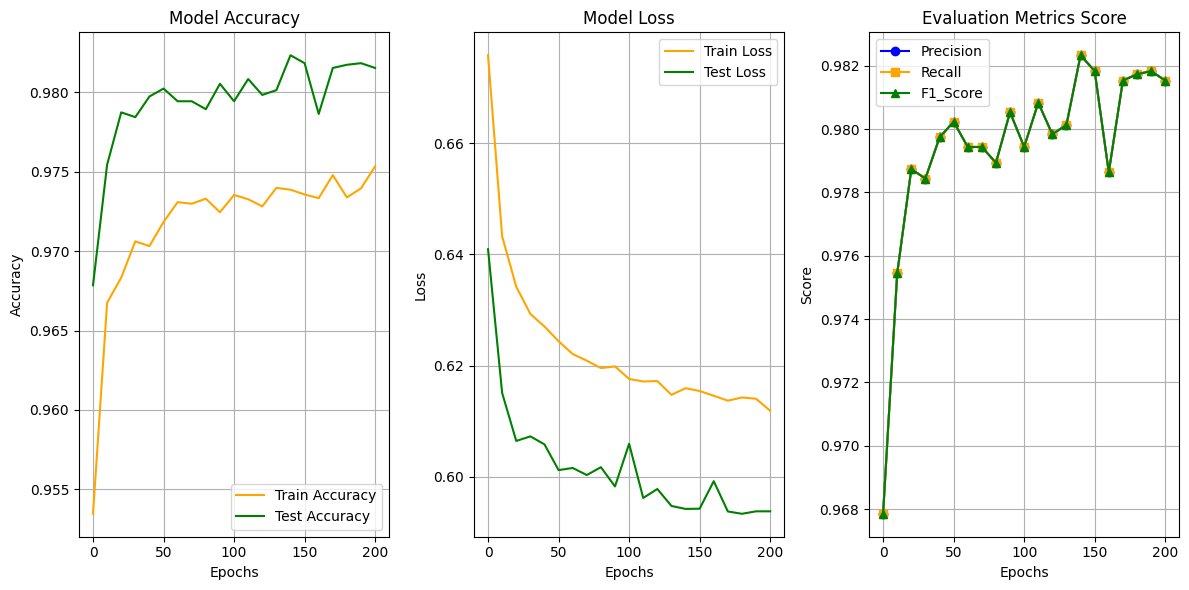

In [ ]:
tracking_plot(history_0)

In [ ]:
best_acc,best_loss = max(history_0["test_acc"]), max(history_0["test_loss"])
best_acc.item(),best_loss.item()

(tensor(0.9837, device='cuda:0'), tensor(0.9777, device='cuda:0'))

* ConfusionMatrix Plotting

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import torch
import matplotlib.pyplot as plt

def cm_plot(test_dataloader:torch.utils.data.DataLoader,
            model: torch.nn.Module(),
            ):
  y_true,y_pred = [],[]
  model.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      X,y = X.to(device), y.to(device)

      pred_logits = model(X)
      pred_label = pred_logits.argmax(dim=1)

      y_true.append(y.cpu())
      y_pred.append(pred_label.cpu())

  y_true = torch.cat(y_true).numpy()
  y_pred = torch.cat(y_pred).numpy()

  cm= confusion_matrix(y_true,y_pred)
  ConfusionMatrixDisplay(cm).plot()




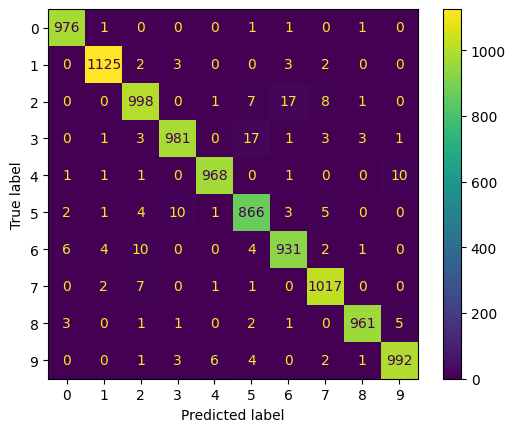

In [ ]:
cm_plot(test_dataloader=test_dataloader,model=model_0)


# 9.Testing on several samples and real-world data

In [ ]:
import torch
import matplotlib.pyplot as plt

def predict_and_plot(nrows:int,
                     ncols:int,
                     dataset: torchvision.datasets,
                     class_names:list,
                     model:torch.nn.Module,
                     device= "cuda" if torch.cuda.is_available() else "cpu",
                     ):
  model_0.eval()
  #width,tall
  plt.figure(figsize=(nrows,ncols))

  for i in range(1,nrows*ncols+1):
    idx = torch.randint(0,len(test_dataset),size=[1]).item()
    img,label = dataset[idx]
    img = img.to(device)

    y_pred = model(img.unsqueeze(dim=0))
    y_pred_label = y_pred.argmax(dim=1)

    plt.subplot(nrows,ncols,i)
    plt.imshow(img.cpu().squeeze())

    if(y_pred_label == label):
      plt.title(class_names[label],c="green")
    else:
      plt.title(f"Predict:{class_names[y_pred_label]} \n True:{class_names[label]}", c="red")

    plt.axis(False)
    plt.tight_layout()
plt.show()


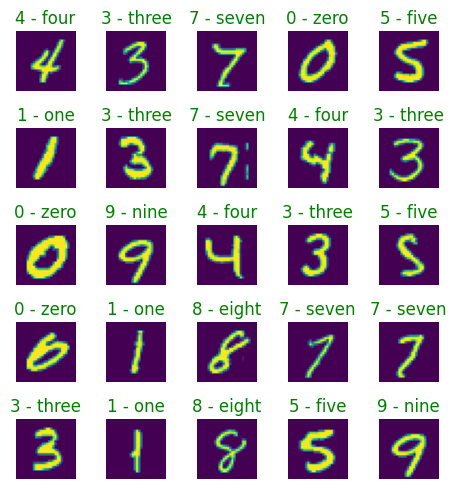

In [ ]:
predict_and_plot(nrows=5,ncols=5,dataset=test_dataset,class_names=class_names,model=model_0,device=device)

In [ ]:
from google.colab import files
files.upload()

Saving 462643653_2381675498831507_3756396729077595891_n.jpg to 462643653_2381675498831507_3756396729077595891_n.jpg


{'462643653_2381675498831507_3756396729077595891_n.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x0f\x0f\x0f\x0f\x10\x0f\x11\x12\x12\x11\x17\x19\x16\x19\x17"\x1f\x1d\x1d\x1f"4%(%(%4N191191NETD?DTE|bVVb|\x90yry\x90\xae\x9b\x9b\xae\xdb\xd0\xdb\xff\xff\xff\xff\xdb\x00C\x01\x0f\x0f\x0f\x0f\x10\x0f\x11\x12\x12\x11\x17\x19\x16\x19\x17"\x1f\x1d\x1d\x1f"4%(%(%4N191191NETD?DTE|bVVb|\x90yry\x90\xae\x9b\x9b\xae\xdb\xd0\xdb\xff\xff\xff\xff\xc0\x00\x11\x08\x00\xf0\x04\x92\x03\x01!\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\x

In [ ]:
single_img = "/content/462643653_2381675498831507_3756396729077595891_n.jpg"

In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class CustomImage(Dataset):
  def __init__(self,img_path,transform=None):
    self.img_path = img_path
    self.transform = transform
    self.image = Image.open(self.img_path).convert('L')


  def __getitem__(self,idx):
    img = self.image
    label = 3
    if self.transform:
      img = self.transform(img)
    return img,label

In [ ]:
transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor()
])

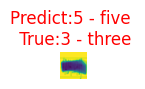

In [ ]:
img_dataset = CustomImage(single_img,transform=transform)
predict_and_plot(nrows=1,ncols=1,dataset=img_dataset,class_names=class_names,model=model_0,device=device)

#  10. Combining all the above steps and Write file.py

In [1]:
from pathlib import Path
going_modular_path = Path("going_modular")
going_modular_path.mkdir(parents=True,exist_ok=True)

In [2]:
from pathlib import Path

data = Path("data")
data.mkdir(parents=True,exist_ok=True)

train_dir = "data/train_mnist"
test_dir = "data/test_mnist"

In [3]:
%%writefile going_modular/data_setup.py

import os
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()


def create_dataloaders(
    train_dir:str,
    test_dir:str,
    batch_size:int,
    num_workers= NUM_WORKERS,
):
  train_transform = transforms.Compose([
      transforms.RandomAffine(degrees=10,translate=(0.1,0.1),scale=(0.9,1.1)),
      transforms.ToTensor(),
  ])

  test_transform = transforms.Compose([
      transforms.ToTensor(),
  ])


  train_data = datasets.MNIST(
      root=train_dir,
      train=True,
      download= True,
      transform = train_transform,
  )

  test_data = datasets.MNIST(
      root=test_dir,
      train=False,
      download=True,
      transform = test_transform,
  )


  class_names = train_data.classes

  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers= num_workers,
      pin_memory= True,
  )

  test_dataloader = DataLoader(
      test_data,
      batch_size= batch_size,
      shuffle=False,
      num_workers = num_workers,
      pin_memory = True,
  )

  return train_dataloader,test_dataloader,class_names

Overwriting going_modular/data_setup.py


In [4]:
from going_modular import data_setup
import torch
import torch.nn as nn
import os
train_dataloader,test_dataloader,class_names = data_setup.create_dataloaders(
      train_dir = train_dir,
      test_dir = test_dir,
      batch_size= 32,
      num_workers = os.cpu_count()
      )

In [5]:
%%writefile going_modular/CNN_model.py
import torch
from torch import nn
import torchvision
from torchvision import transforms

class CNN_Model(nn.Module):
  def __init__(self,input_layer,hidden_layer,output_layer):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     )
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_layer * 7 *7,
                  out_features = output_layer,
                  )
    )
  def forward(self,x):
    return self.classifier(self.block_2(self.block_1(x)))


Overwriting going_modular/CNN_model.py


In [6]:
from going_modular import CNN_model
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN_model.CNN_Model(input_layer=1,
                            hidden_layer=10,
                            output_layer=10,
                            ).to(device)
model

CNN_Model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [7]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary
summary(model=model,input_size=(32,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN_Model                                [32, 10]                  --
├─Sequential: 1-1                        [32, 10, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 10, 28, 28]          100
│    └─ReLU: 2-2                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-3                       [32, 10, 28, 28]          910
│    └─ReLU: 2-4                         [32, 10, 28, 28]          --
│    └─MaxPool2d: 2-5                    [32, 10, 14, 14]          --
├─Sequential: 1-2                        [32, 10, 7, 7]            --
│    └─Conv2d: 2-6                       [32, 10, 14, 14]          910
│    └─ReLU: 2-7                         [32, 10, 14, 14]          --
│    └─Conv2d: 2-8                       [32, 10, 14, 14]          910
│    └─ReLU: 2-9                         [32, 10, 14, 14]          --
│    └─MaxPool2d: 2-10                   [32, 10, 7, 7]            --
├─Sequentia

In [8]:
%%writefile going_modular/compiling.py
from tqdm.auto import tqdm
import torch
from torch import nn
import os


def install(package):
  os.system(f"pip install {package}")

try:
  import torchmetrics
  from torchmetrics import Accuracy
  from torchmetrics import Precision
  from torchmetrics import Recall
  from torchmetrics import F1Score
except:
  install("torchmetrics")
  import torchmetrics
  from torchmetrics import Accuracy
  from torchmetrics import Precision
  from torchmetrics import Recall
  from torchmetrics import F1Score

try:
  from early_stopping_pytorch import EarlyStopping
except:
  install("early_stopping_pytorch")
  from early_stopping_pytorch import EarlyStopping

def accuracy(y_pred,y_true,num_classes:int,device:torch.device):
  acc = Accuracy(task="multiclass",num_classes = num_classes).to(device)
  return acc(y_pred,y_true)
def precision(y_pred,y_true,num_classes:int,device:torch.device):
  precision = Precision(task="multiclass",average="micro",num_classes = num_classes).to(device)
  return precision(y_pred,y_true)
def recall(y_pred,y_true,num_classes:int,device:torch.device):
  recall = Recall(task="multiclass",average="micro",num_classes= num_classes).to(device)
  return recall(y_pred,y_true)
def f1(y_pred,y_true,num_classes:int,device:torch.device):
  f1 = F1Score(task="multiclass",average="micro",num_classes=num_classes).to(device)
  return f1(y_pred,y_true)

def train_step(dataloader:torch.utils.data.DataLoader,
               model:torch.nn.Module,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               num_classes:int,
               device:torch.device
               ):
  model.train()
  train_loss,train_acc = 0,0

  for batch,(X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    y_pred_label = y_pred.argmax(dim=1)
    acc = accuracy(y_pred_label,y,num_classes,device)
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(dataloader)
  train_acc /=len(dataloader)

  return train_acc,train_loss

def test_step(dataloader:torch.utils.data.DataLoader,
              model:torch.nn.Module,
              loss_fn: torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              num_classes:int,
              device:torch.device,
              ):
  model.eval()
  test_loss,test_acc,precision_score,recall_score,f1_score = 0,0,0,0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred,y)
      test_loss+= loss

      y_pred_label = y_pred.argmax(dim=1)
      acc = accuracy(y_pred_label,y,num_classes,device)
      test_acc += acc

      pre = precision(y_pred_label,y,num_classes,device)
      precision_score+= pre.item()

      re = recall(y_pred_label,y,num_classes,device)
      recall_score+= re.item()

      f1score = f1(y_pred_label,y,num_classes,device)
      f1_score+= f1score.item()

    test_loss/=len(dataloader)
    test_acc /=len(dataloader)
    precision_score/=len(dataloader)
    recall_score /= len(dataloader)
    f1_score /= len(dataloader)

  return test_acc,test_loss,precision_score,recall_score,f1_score


def compile(model:torch.nn.Module,
            train_dataloader:torch.utils.data.DataLoader,
            test_dataloader:torch.utils,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            device:torch.device,
            num_classes:int,
            epochs:int,
            ):

  history={
      "epochs":[],
      "train_acc":[],
      "train_loss":[],
      "test_acc":[],
      "test_loss":[],
      "precision":[],
      "recall":[],
      "f1":[],

  }
  early_stopping = EarlyStopping(patience=5,delta=1e-3,verbose=True)

  for epoch in tqdm(range(epochs)):
    train_acc,train_loss = train_step(dataloader=train_dataloader,
                                      model=model,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      num_classes=num_classes,
                                      device=device,
                                      )

    test_acc,test_loss,precision,recall,f1 = test_step(dataloader=test_dataloader,
                                   model=model,
                                   loss_fn = loss_fn,
                                   optimizer=optimizer,
                                   num_classes=num_classes,
                                   device=device,
                                   )

    print('-'*100)
    print(f"Epochs: {epoch+1}")
    print(f"Train acc: {train_acc:.3f} | Train loss: {train_loss:.3f} | Test acc: {test_acc:.3f} | Test loss: {test_loss:.3f}")

    history["epochs"].append(epoch)
    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)
    history["precision"].append(precision)
    history["recall"].append(recall)
    history["f1"].append(f1)


    early_stopping(test_loss.item(),model)
    if early_stopping.early_stop:
      print('-'*100)
      print(f"Stopping at epoch: {epoch}")
      break

  print("Saving best model state")
  model.load_state_dict(torch.load('checkpoint.pt',weights_only=True))


  return history


Overwriting going_modular/compiling.py


In [9]:
%%writefile going_modular/tracking.py
import matplotlib.pyplot as plt
import torch

def tracking_plot(history):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))

    epochs = history["epochs"]
    train_acc = [acc.cpu().item() for acc in history["train_acc"]]
    train_loss = history["train_loss"]
    test_acc = [x.cpu().item() for x in history["test_acc"]]
    test_loss = [x.cpu().item() for x in history["test_loss"]]
    precision = [x for x in history["precision"]]
    recall = [x for x in history["recall"]]
    f1 = [x for x in history["f1"]]


    ax1.plot(epochs, train_acc, label="Train Accuracy", c="orange")
    ax1.plot(epochs, test_acc, label="Test Accuracy", c="green")
    ax1.set(title="Model Accuracy", xlabel="Epochs", ylabel="Accuracy")
    ax1.grid(True)
    ax1.legend(loc="best")

    ax2.plot(epochs, train_loss, label="Train Loss", c="orange")
    ax2.plot(epochs, test_loss, label="Test Loss", c="green")
    ax2.set(title="Model Loss", xlabel="Epochs", ylabel="Loss")
    ax2.grid(True)
    ax2.legend(loc="best")

    ax3.plot(epochs,precision,label="Precision",c="blue",marker="o")
    ax3.plot(epochs,recall,label="Recall",c="orange",marker="s")
    ax3.plot(epochs,f1,label="F1_Score",c="green",marker="^")
    ax3.set(title="Evaluation Metrics Score",xlabel="Epochs",ylabel="Score")
    ax3.grid(True)
    ax3.legend(loc="best")

    plt.tight_layout()
    plt.show()


Overwriting going_modular/tracking.py


In [10]:
from going_modular import compiling
import torch
from torch import nn
epochs = 100
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-4)

history = compiling.compile(model=model,
                            train_dataloader = train_dataloader,
                            test_dataloader = test_dataloader,
                            loss_fn = loss_fn,
                            optimizer = optimizer,
                            device = device,
                            num_classes = len(class_names),
                            epochs = epochs,
                            )


  0%|          | 0/100 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Epochs: 1
Train acc: 0.870 | Train loss: 0.906 | Test acc: 0.974 | Test loss: 0.666
Validation loss decreased (inf --> 0.665590).  Saving model ...
----------------------------------------------------------------------------------------------------
Epochs: 2
Train acc: 0.945 | Train loss: 0.727 | Test acc: 0.980 | Test loss: 0.629
Validation loss decreased (0.665590 --> 0.628713).  Saving model ...
----------------------------------------------------------------------------------------------------
Epochs: 3
Train acc: 0.958 | Train loss: 0.687 | Test acc: 0.982 | Test loss: 0.616
Validation loss decreased (0.628713 --> 0.615829).  Saving model ...
----------------------------------------------------------------------------------------------------
Epochs: 4
Train acc: 0.965 | Train loss: 0.666 | Test acc: 0.984 | Test loss: 0.603
Validation loss decreased (0.615829 --> 0.602630).  Saving

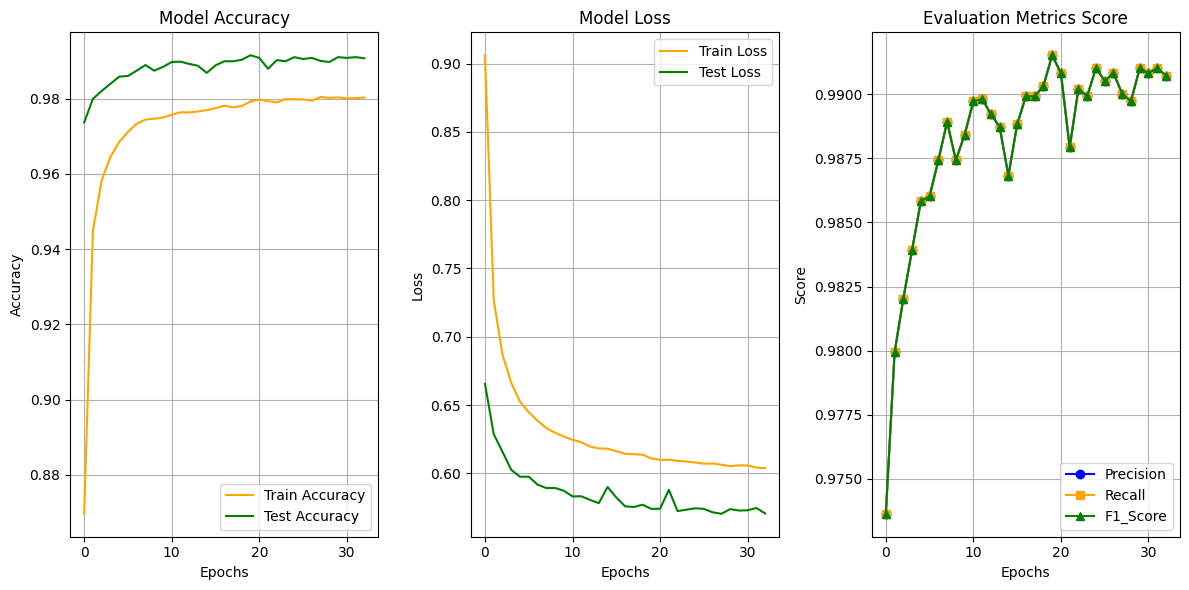

In [11]:
from going_modular import tracking
tracking.tracking_plot(history)

In [12]:
%%writefile going_modular/confusion_matrix.py
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import torch
import matplotlib.pyplot as plt
#%matplotlib inline
device = "cuda" if torch.cuda.is_available() else "cpu"
def cm_plot(test_dataloader:torch.utils.data.DataLoader,
            model: torch.nn.Module(),
            ):
  y_true,y_pred = [],[]
  model.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      X,y = X.to(device), y.to(device)

      pred_logits = model(X)
      pred_label = pred_logits.argmax(dim=1)

      y_true.append(y.cpu())
      y_pred.append(pred_label.cpu())

  y_true = torch.cat(y_true).numpy()
  y_pred = torch.cat(y_pred).numpy()

  cm= confusion_matrix(y_true,y_pred)
  ConfusionMatrixDisplay(cm).plot()
plt.show()



Overwriting going_modular/confusion_matrix.py


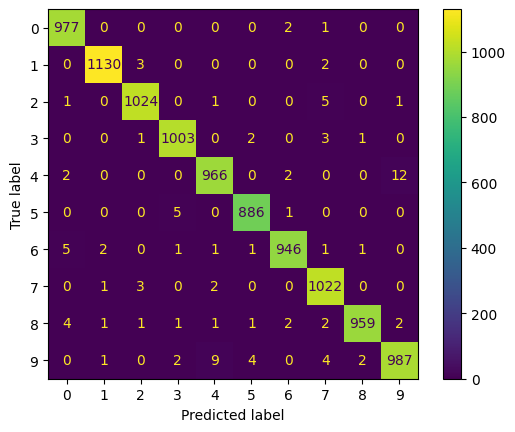

In [13]:
from going_modular import confusion_matrix
confusion_matrix.cm_plot(test_dataloader=test_dataloader,model=model)

In [23]:
print(max(history["test_acc"]),min(history["test_loss"]))

tensor(0.9915, device='cuda:0') tensor(0.5705, device='cuda:0')


In [14]:
%%writefile going_modular/utils.py
import torch
from pathlib import Path

def save(model:torch.nn.Module,
         target_dir:str,
         model_name:str,
         ):
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)
  assert model_name.endswith(".pth") or model_name.endswith(".pt")
  model_save_path = target_dir_path/model_name

  torch.save(obj = model.state_dict(),f=model_save_path)

Overwriting going_modular/utils.py


In [15]:
from going_modular import utils
utils.save(model=model,
           target_dir = "models",
           model_name="cnn_model.pth"
           )


# 11. Model Deployment

In [16]:
from pathlib import Path
demos_path = Path("demos/my_folder")
demos_path.mkdir(parents=True,exist_ok=True)

In [17]:
import shutil
import os
(demos_path/"examples").mkdir(parents=True,exist_ok=True)
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  example_path = os.path.join("demos/my_folder/examples",filename)
  shutil.move(filename,example_path)


In [18]:
demos_class = demos_path/"class_names.txt"

with open(demos_class,"w") as f:
  f.write("\n".join(class_names))


In [19]:
%%writefile demos/my_folder/model.py
#from going_modular import cnn_model
import torch
from torch import nn
import torchvision
from torchvision import transforms


class CNN_Model(nn.Module):
  def __init__(self,input_layer,hidden_layer,output_layer):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     )
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_layer,
                  out_channels = hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_layer * 7 *7,
                  out_features = output_layer,
                  )
    )
  def forward(self,x):
    return self.classifier(self.block_2(self.block_1(x)))




def create_model(device):
  transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
  ])
  model = CNN_Model(input_layer=1,
                    hidden_layer=10,
                    output_layer=10,
                    )

  for param in model.parameters():
    param.requires_grad=False

  return model,transform




Overwriting demos/my_folder/model.py


In [20]:
%%writefile demos/my_folder/app.py
import os
try:
  import gradio as gr
except:
  os.system("pip install gradio")
  import gradio as gr
import torch
from model import create_model
#from demos.my_folder.model import create_model
from timeit import default_timer as timer

with open("class_names.txt","r") as f:
  class_names = [string.strip() for string in f.readlines()]

model,deploy_transform = create_model(device="cpu")

model.load_state_dict(
    torch.load(f="models/cnn_model.pth",
               map_location=torch.device("cpu"),
               )
)

def predict(img):
  start_time = timer()
  img = deploy_transform(img).unsqueeze(dim=0)

  model.eval()
  with torch.inference_mode():
    pred_probs = torch.softmax(model(img),dim=1)
  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

  end_time = timer()
  pred_time = round(end_time-start_time,3)
  return pred_labels_and_probs,pred_time

example_list = [["examples/" + example]for example in os.listdir("examples")]

demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=3,label="Predictions"),
        gr.Number(label="Prediction time (s)"),
    ],
    title="Pixel Digits Classification App",
)
demo.launch(share=True)


Overwriting demos/my_folder/app.py


In [21]:
%%writefile demos/my_folder/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.41.0
httpx==0.28.1

Overwriting demos/my_folder/requirements.txt


In [22]:
"""
!cd demos/my_folder && zip -r ../my_folder.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"
from google.colab import files
files.download("demos/my_folder.zip")
"""

'\n!cd demos/my_folder && zip -r ../my_folder.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"\nfrom google.colab import files\nfiles.download("demos/my_folder.zip")\n'